In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\PIYUSH\DA\ML\Logistic reg\term deposit.csv")

In [3]:
df

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.shape

(45211, 18)

In [5]:
df.columns

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [7]:
df.isna().sum()

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.dropna(subset=['age'], inplace=True)
df.dropna(subset=['balance'], inplace=True)

In [9]:
df.isna().sum()

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

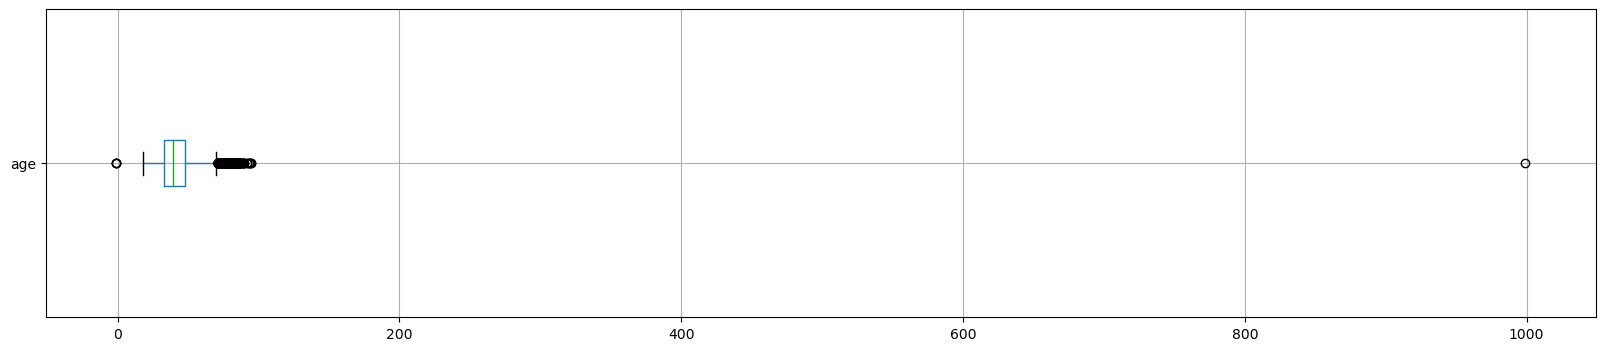

In [10]:
plt.figure(figsize=(20,4))
age = pd.DataFrame(df['age'])
age.boxplot(vert=False)

In [11]:
df = df[df['age']>= 18]
df = df[df['age']< 120]

<Axes: >

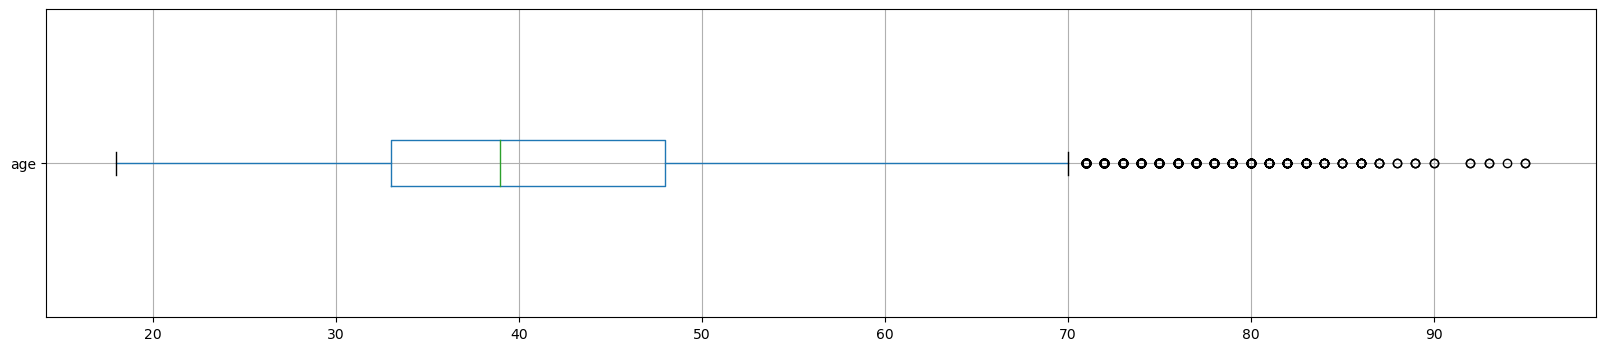

In [12]:
plt.figure(figsize=(20,4))
age = pd.DataFrame(df['age'])
age.boxplot(vert=False)

<Axes: >

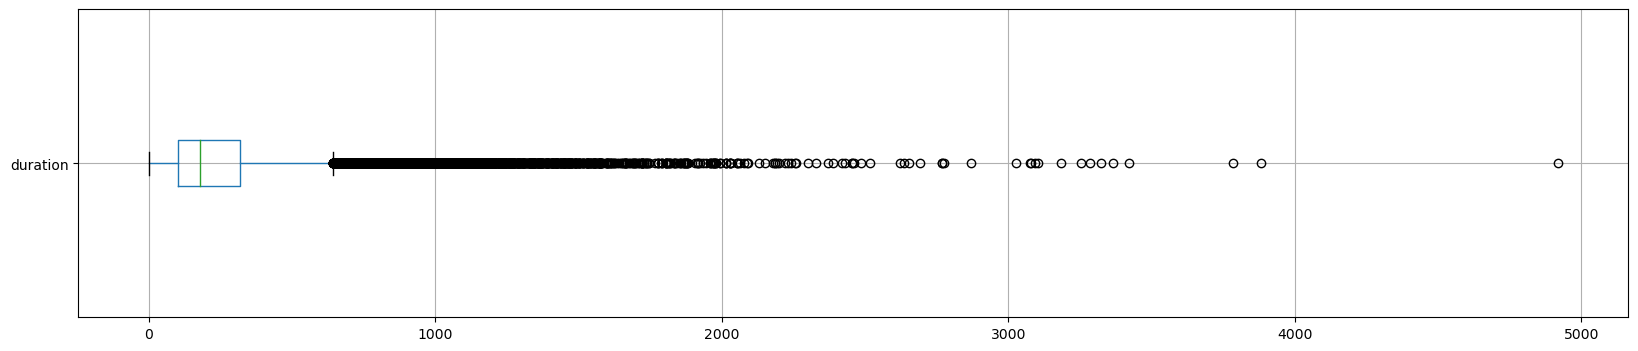

In [13]:
plt.figure(figsize=(20,4))
duration = pd.DataFrame(df['duration'])
duration.boxplot(vert=False)

<Axes: >

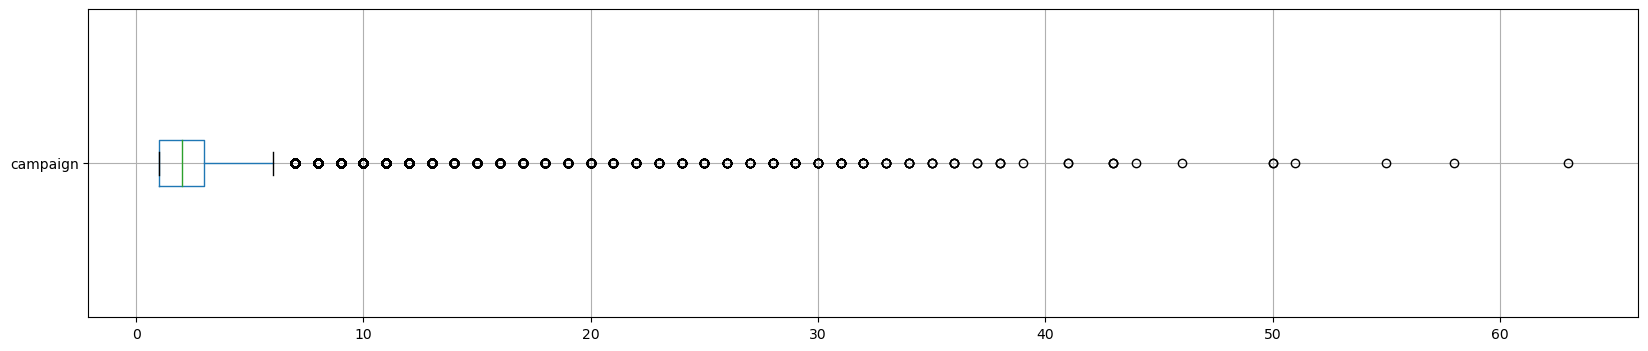

In [14]:
plt.figure(figsize=(20,4))
campaign = pd.DataFrame(df['campaign'])
campaign.boxplot(vert=False)

<Axes: >

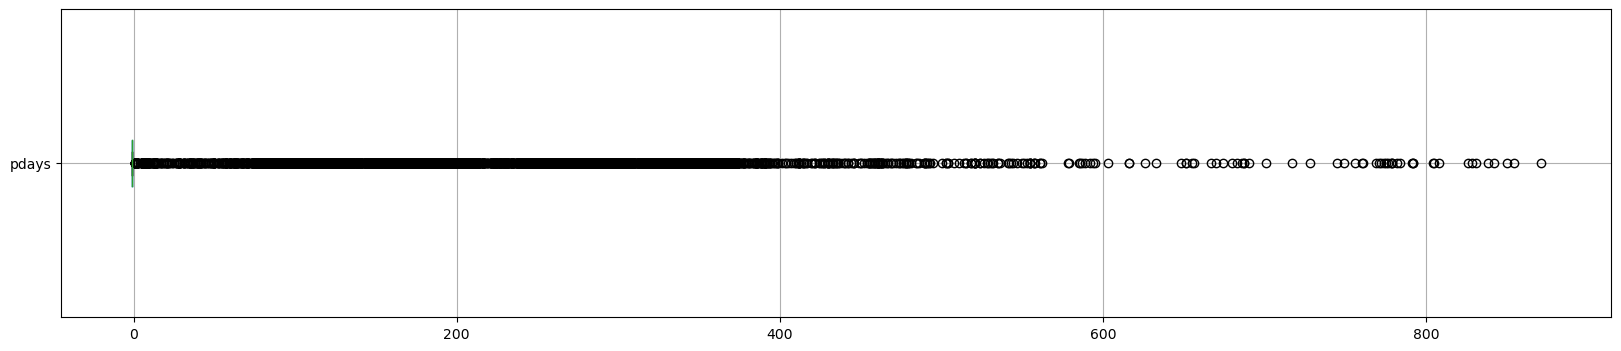

In [15]:
plt.figure(figsize=(20,4))
pdays = pd.DataFrame(df, columns=['pdays'])
pdays.boxplot(vert=False)

In [16]:
len(df[df['pdays']== -1])

36940

<Axes: >

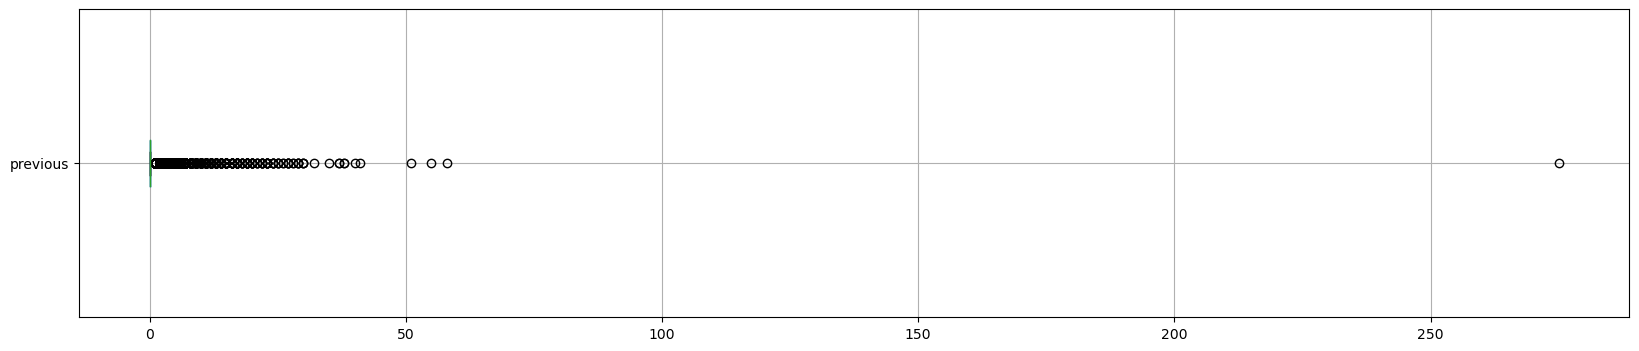

In [17]:
plt.figure(figsize=(20,4))
previous = pd.DataFrame(df, columns=['previous'])
previous.boxplot(vert=False)

In [18]:
df = df[df['previous']<=50]
df = df.reset_index(drop=True)

<Axes: >

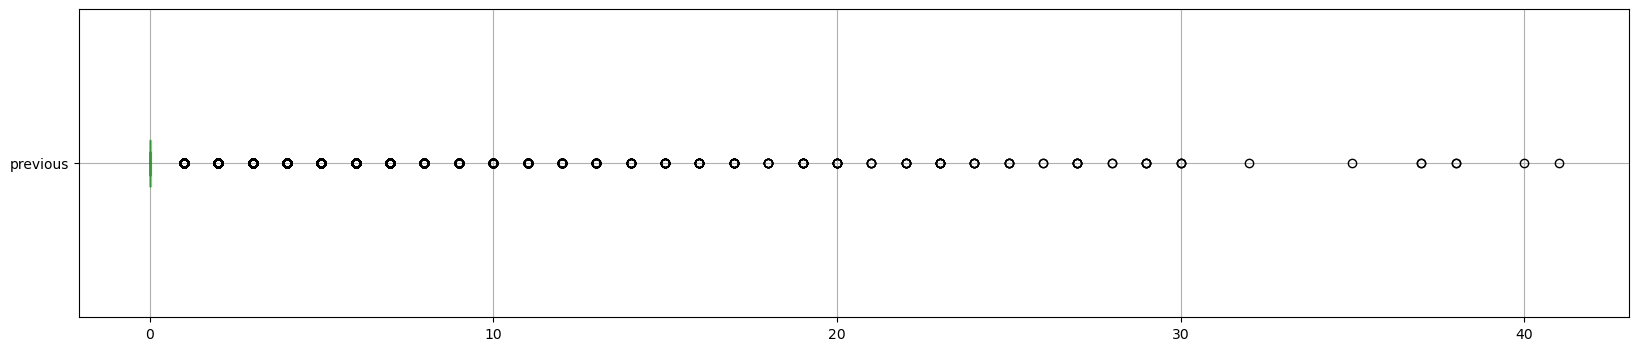

In [19]:
plt.figure(figsize=(20,4))
previous = pd.DataFrame(df, columns=['previous'])
previous.boxplot(vert=False)

<Axes: >

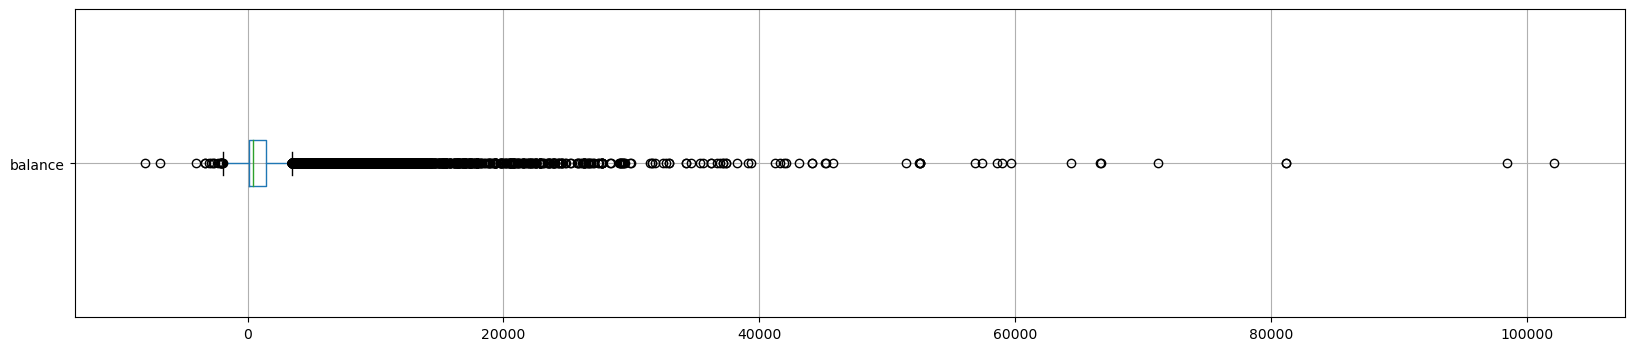

In [20]:
plt.figure(figsize = (20,4))
balance = pd.DataFrame(df, columns=['balance'])
balance.boxplot(vert=False)

<Axes: >

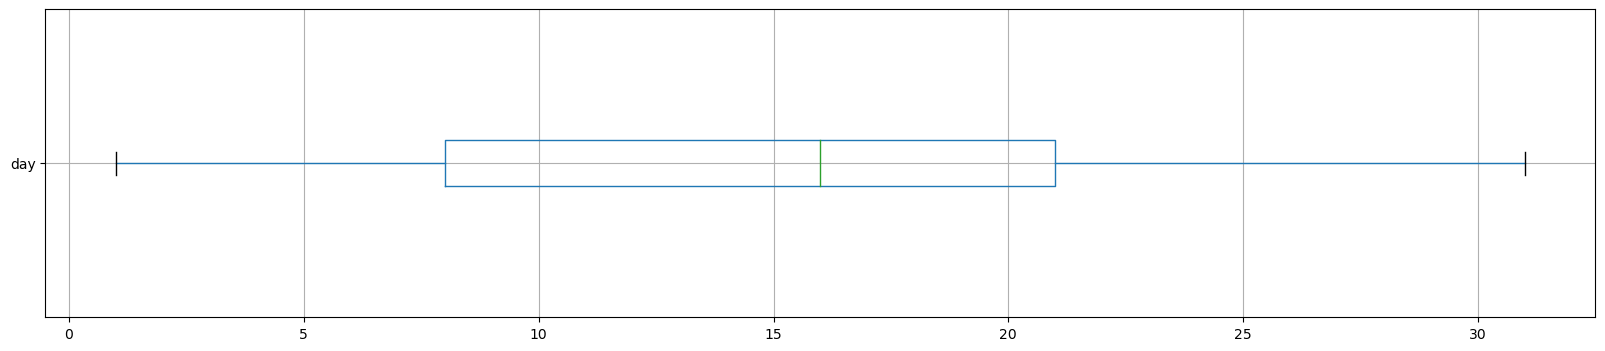

In [21]:
plt.figure(figsize = (20,4))
day = pd.DataFrame(df, columns=['day'])
day.boxplot(vert=False)

In [22]:
corr = df.corr()

<Axes: >

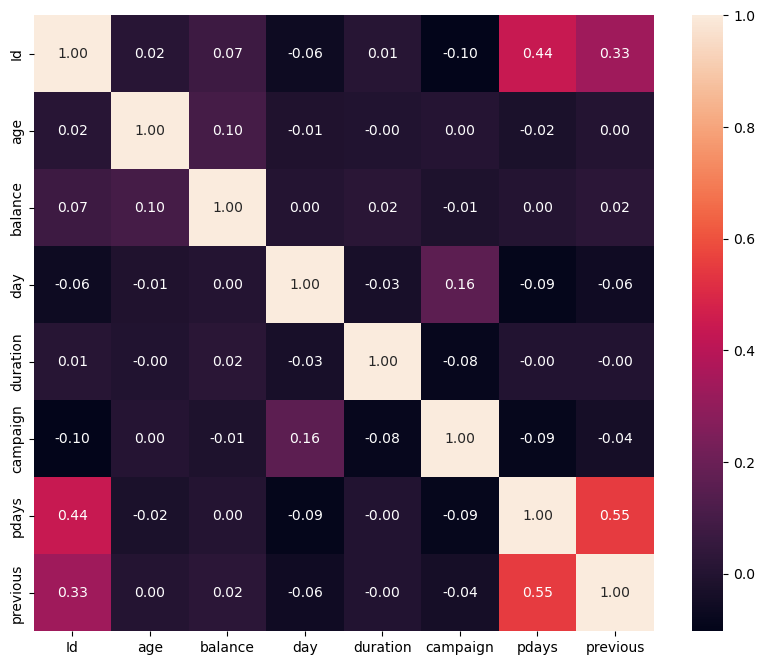

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f')

In [24]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome', 'pdays']
num_cols = ['duration', 'balance', 'campaign','day', 'age', 'previous']

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [26]:
encoder = OneHotEncoder(drop='first', sparse=False)
encoder_cols=pd.DataFrame(encoder.fit_transform(df[cat_cols]),columns=encoder.get_feature_names_out(cat_cols))

In [27]:
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(df[num_cols]),columns=scaler.get_feature_names_out(num_cols))

In [28]:
pd.concat([encoder_cols,scaled_cols],axis=1)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,pdays_842,pdays_850,pdays_854,pdays_871,duration,balance,campaign,day,age,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.416121,-0.437933,-0.569450,-1.298959,0.288558,-0.307445
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.707438,-0.446799,-0.569450,-1.298959,-0.747420,-0.307445
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.645290,0.047080,-0.569450,-1.298959,0.571098,-0.307445
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.233563,-0.447127,-0.569450,-1.298959,-0.747420,-0.307445
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.462732,-0.371601,-0.569450,-1.298959,-0.559061,-0.307445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.792246,-0.176545,0.076029,0.143069,0.947817,-0.307445
45188,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.768566,0.120308,-0.246711,0.143069,2.831415,-0.307445
45189,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.374879,1.429217,0.721507,0.143069,2.925595,1.308769
45190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.970546,-0.228100,0.398768,0.143069,1.512897,-0.307445


In [29]:
X = pd.concat([encoder_cols,scaled_cols],axis=1)
y = df['y']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [32]:
print('Train Score: ', log_model.score(X_train, y_train))

Train Score:  0.9039913700107874


In [33]:
print('Test Score: ', log_model.score(X_test, y_test))

Test Score:  0.9041929416970904


In [34]:
pred_train = log_model.predict(X_train)
pred_test = log_model.predict(X_test)

In [35]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     31941
         yes       0.66      0.36      0.47      4212

    accuracy                           0.90     36153
   macro avg       0.79      0.67      0.71     36153
weighted avg       0.89      0.90      0.89     36153



In [36]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7967
         yes       0.67      0.38      0.48      1072

    accuracy                           0.90      9039
   macro avg       0.80      0.68      0.72      9039
weighted avg       0.89      0.90      0.89      9039



In [45]:
y_train = y_train.map({'no': 0, 'yes': 1})

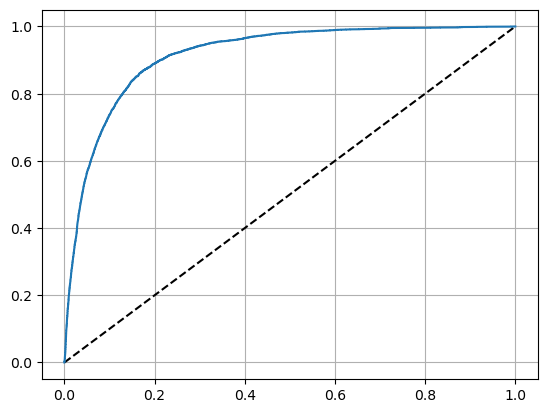

In [47]:
roc = log_model.predict_proba(X_train)[:, 1]

fpr, tpr, threshold = metrics.roc_curve(y_train, roc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='logistic')
plt.grid(True)
plt.show()